# 1. Introduction - Clustering

As derived from https://machinelearningmastery.com/clustering-algorithms-with-python/#:~:text=Cluster%20analysis%2C%20or%20clustering%2C%20is,or%20clusters%20in%20feature%20space. :

"Cluster analysis, or clustering, is an unsupervised machine learning task.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

A cluster is often an area of density in the feature space where examples from the domain (observations or rows of data) are closer to the cluster than other clusters. The cluster may have a center (the centroid) that is a sample or a point feature space and may have a boundary or extent.

Clustering can be helpful as a data analysis activity in order to learn more about the problem domain, so-called pattern discovery or knowledge discovery.

Clustering can also be useful as a type of feature engineering, where existing and new examples can be mapped and labeled as belonging to one of the identified clusters in the data."

The following notebook will focusing on clustering the UCI banknote-authentication dataset using the K means clustering method.

# 2. Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3. Import Dataset

This report describes Banknotes Authentication prediction using classification model. The dataset used in this project is the banknotes authentication data from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object grayscale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

The dataset contains a total of 1372 records of different banknotes. The four left columns are data that we can use to predict whether a note is genuine or counterfeit, which is external data provided by a human, coded as 0 and 1. Where 0 represents real and 1 represents fake banknote. Machine learning algorithms require data where features and labels are separated from each other. The label means the output class or output category. In our dataset, variance, skewness, curtosis, and entropy are features whereas the class column contains the label.

In [333]:
df = pd.read_csv(r'C:\Users\Acer\Downloads\data_banknote_authentication.txt')

In [334]:
df

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


# 4. Data Preprocessing

In [335]:
df.loc[len(df.index)] = [float(col) for col in df.columns]

In [336]:
df

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0.0
1,3.86600,-2.63830,1.9242,0.10645,0.0
2,3.45660,9.52280,-4.0112,-3.59440,0.0
3,0.32924,-4.45520,4.5718,-0.98880,0.0
4,4.36840,9.67180,-3.9606,-3.16250,0.0
...,...,...,...,...,...
1367,-1.38870,-4.87730,6.4774,0.34179,1.0
1368,-3.75030,-13.45860,17.5932,-2.77710,1.0
1369,-3.56370,-8.38270,12.3930,-1.28230,1.0
1370,-2.54190,-0.65804,2.6842,1.19520,1.0


In [337]:
df.columns

Index(['3.6216', '8.6661', '-2.8073', '-0.44699', '0'], dtype='object')

* Obviously we need to change the column titles, as they oddly came in as numerical data.


* The actual variables of the columns and some info on them, as derived from https://rpubs.com/haydenta/banknote-authentication:

    1. Variance of the image of the banknote (finds how each pixel varies from the neighboring pixels and classifies them into different regions)
    
    2. Skewness of the image of the banknote (is the measure of the lack of symmetry; negative values means left skew, positive values means right skew)
    
    3. Kurtosis of the image of the banknote (is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution; negative is light-tailed, positive is right-tailed)
    
    4. Entropy of the image of the banknote (is a quantity which is used to describe the amount of information which must be coded for, by a compression algorithm)
    
    5. Class of the banknote (Genuine banknotes (0) vs fake banknotes (1))

In [338]:
df.rename({'3.6216': 'ImgVariance', '8.6661': 'ImgSkewness', \
           '-2.8073': 'ImgKurtosis', '-0.44699': 'ImgEntropy', \
           '0': 'ImgClass'}, axis=1, inplace=True)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ImgVariance  1372 non-null   float64
 1   ImgSkewness  1372 non-null   float64
 2   ImgKurtosis  1372 non-null   float64
 3   ImgEntropy   1372 non-null   float64
 4   ImgClass     1372 non-null   float64
dtypes: float64(5)
memory usage: 64.3 KB


* Variance = ImgVariance, Skewness = ImgSkewness, etc. 

In [340]:
df.shape

(1372, 5)

In [341]:
df.describe()

,ImgVariance,ImgSkewness,ImgKurtosis,ImgEntropy,ImgClass
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


* All independent variables have negative to positive intervals (which makes sense as they are primarily mean-oriented variables)


* Skewness and Kurtosis appear to have materially higher maxes than variance and entropy, which could have some effect


* Means of each independent variable range from -1.19 to 1.92

# 5. Exploratory Data Analysis

Things to be handled (on our dataset) when applying K-Means:

1. Missing values - Missing values should be treated, if there are any.


2. Categorical data - K means cannot handle categorical data.


3. Multicollinearity - Dealing with this can help bring certain samples closer together.


4. Outliers - It is a distance-based approach, and K-Means does not handle outliers well, as it has no outlier detection method.


5. Scale - If one of the variables is on a much larger scale than the others that variable will have an outsized effect on the distance calculated. This means that we generally need to re-scale data before using k-means clustering.

Dimension reduction on other datasets would be taken into consideration; but this all works towards two assumptions of K means:


1. Expectation of spherical clusters - K means calculates distance from centroids (therefore forming a spherical shape)


2. Size of clusters - K means assumes features within a cluster have equal variance, and therefore expects density of clusters to be fairly similar (size moreso pertaince to density/distance, etc)



In [171]:
df.isna().any()

ImgVariance    False
ImgSkewness    False
ImgKurtosis    False
ImgEntropy     False
ImgClass       False
dtype: bool

* No missing values

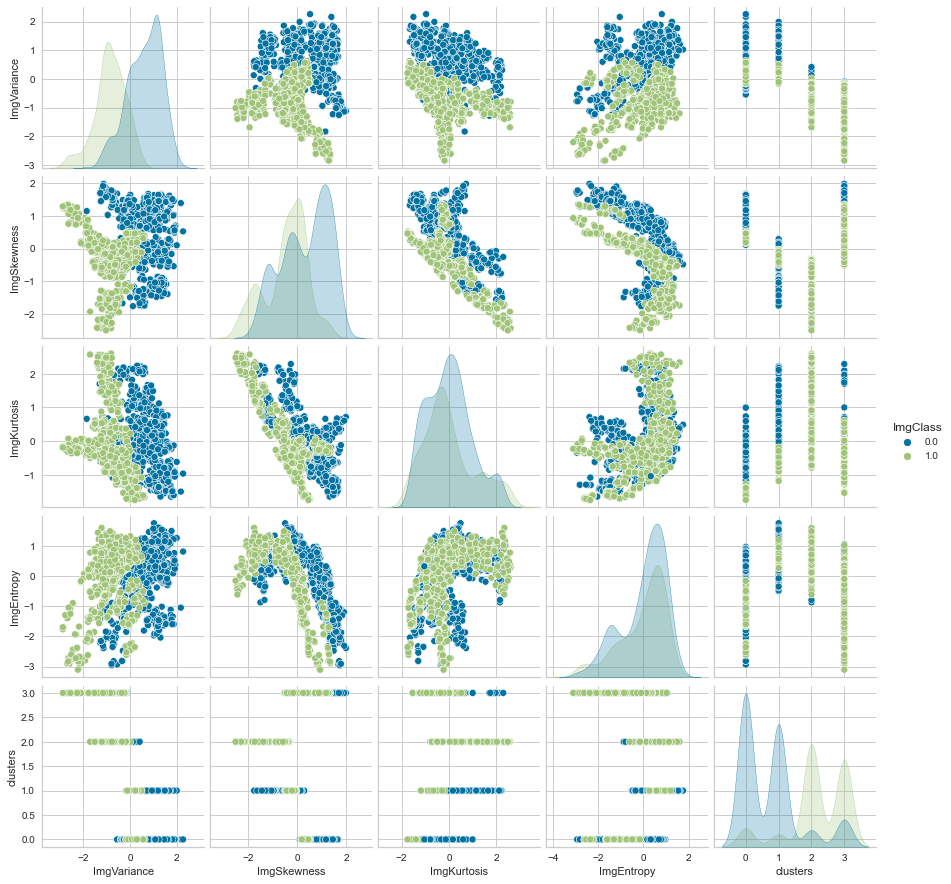

In [374]:
import seaborn as sns

sns.pairplot(df, hue="ImgClass")

plt.show()

* None of the independent variables are categorical; they are all continuous.


* Variance and skewness seem to be closer to Gaussian distributions, than kurtosis and entropy.


* Very obvious strong linear relationships exist between skewness/kurtosis, variance/entropy, with other material positive and negative correlations; a few parabolic appearing correlations exist as well, especially with skewness/entropy. But let us view the correlations.

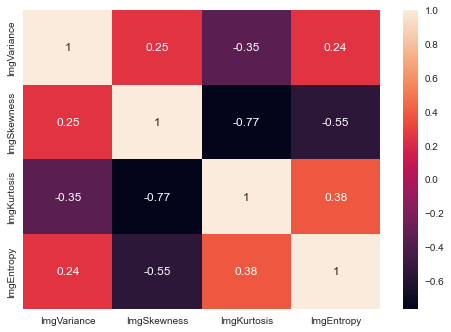

In [293]:
sns.heatmap(df[[col for col in df.columns if col != 'ImgClass']].corr(), annot=True)
plt.show()

* Extremely strong negative correlation between Skewness and Kurtosis (-0.77)


* Very strong negative correlation between Skewness and Entropy (-0.55)


* Moderately negative correlation between Kurtosis and Variance (-0.35)


* Moderately positive correlation between Kurtosis and Entropy (0.38)


* Moderately positive correlation between Skewness and Variance (0.25)


* Moderately positive correlation between Entropy and Variance (0.24)


All in all, there are stronger negative than positive relationships in the independent variables, a few of which could signal real multicollinearity, which we will keep in mind.

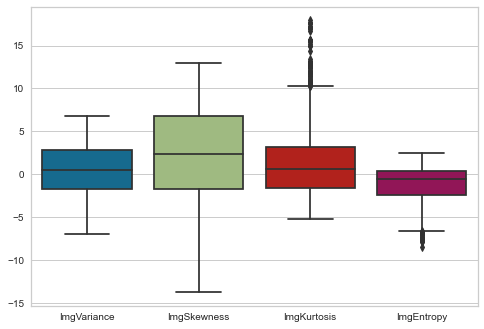

In [149]:
# Box Plot
sns.boxplot(data=df[[col for col in df.columns if col != 'ImgClass' and col != 'clusters']])
plt.show()

* There appear to be outliers related to the kurtosis and entropy variables; as we know this affects K Means materially, let's dig deeper:

In [303]:
print("Highest allowed for Kurtosis: ",df['ImgKurtosis'].mean() + 3*df['ImgKurtosis'].std())
print("Lowest allowed for Kurtosis: ",df['ImgKurtosis'].mean() - 3*df['ImgKurtosis'].std(), "\n")

print("Highest allowed for Entropy: ",df['ImgEntropy'].mean() + 3*df['ImgEntropy'].std())
print("Lowest allowed for Entropy: ",df['ImgEntropy'].mean() - 3*df['ImgEntropy'].std(), "\n")

Highest allowed for Kurtosis:  14.32771738758655
Lowest allowed for Kurtosis:  -11.532463153053023 

Highest allowed for Entropy:  5.111382892035098
Lowest allowed for Entropy:  -7.4946959321225615 



* It appears we have the interquartile ranges for both Kurtosis (-11.53 to 14.33) and Entropy (-7.49 to 5.11), but it appears by looking at the boxplot that the upper limit for Kurtosis is probably closer to 10 than 15, so we will substitute 10 for 14.33; are there a lot of values outside of these ranges?

In [342]:
df[(df['ImgKurtosis'] > 10) | (df['ImgKurtosis'] < -11.54) | (df['ImgEntropy'] > 5.12) | (df['ImgEntropy'] < -7.50)]

,ImgVariance,ImgSkewness,ImgKurtosis,ImgEntropy,ImgClass
44,-0.78690,9.5663,-3.786700,-7.50340,0.0
46,-0.78690,9.5663,-3.786700,-7.50340,0.0
193,-2.34100,12.3784,0.704030,-7.58360,0.0
201,-0.78689,9.5663,-3.786700,-7.50340,0.0
290,-2.21530,11.9625,0.078538,-7.78530,0.0
...,...,...,...,...,...
1328,-2.96720,-13.2869,13.472700,-2.62710,1.0
1363,-2.83910,-6.6300,10.484900,-0.42113,1.0
1364,-4.50460,-5.8126,10.886700,-0.52846,1.0
1368,-3.75030,-13.4586,17.593200,-2.77710,1.0


* More than 80 rows in the dataset, when making the upper limit of kurtosis 10, are outliers; this is material enough tocall for removal.

In [343]:
df = df[(df['ImgKurtosis'] < 10) & (df['ImgKurtosis'] > -11.54) & (df['ImgEntropy'] < 5.12) & (df['ImgEntropy'] > -7.50)]
df.shape

(1289, 5)

In [354]:
#define predictor variable columns
df_x = df[['ImgVariance', 'ImgSkewness', 'ImgKurtosis', 'ImgEntropy']]

#standardize the values for each predictor variable
df[['ImgVariance', 'ImgSkewness', 'ImgKurtosis', 'ImgEntropy']] = (df_x-df_x.mean())/df_x.std()

df.describe()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ImgVariance,ImgSkewness,ImgKurtosis,ImgEntropy,ImgClass,clusters
count,1289.000000,1.289000e+03,1.289000e+03,1.289000e+03,1289.000000,1289.000000
mean,0.000000,-2.204943e-17,-2.204943e-17,9.853337e-17,0.417378,0.868115
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.493318,0.879185
min,-2.852370,-2.511784e+00,-1.748048e+00,-3.106870e+00,0.000000,0.000000
25%,-0.788914,-5.823853e-01,-7.319054e-01,-5.567646e-01,0.000000,0.000000
50%,-0.007091,3.741945e-02,-1.180626e-01,2.808887e-01,0.000000,1.000000
75%,0.838774,8.378758e-01,5.298613e-01,7.539964e-01,1.000000,2.000000
max,2.257772,1.989484e+00,2.601858e+00,1.755745e+00,1.000000,2.000000


* Independent variables are now standardized, making scale no longer an issue; let us verify;

<AxesSubplot:>

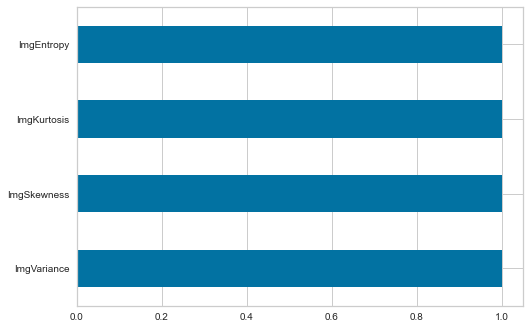

In [355]:
df[['ImgVariance', 'ImgSkewness', 'ImgKurtosis', 'ImgEntropy']].var(axis=0).plot(kind='barh')

* Variance of each independent variable is equal now.

# 6. Clustering - K Means (Exploratory)

From https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h2_9:

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

Let’s now take an example to understand how K-Means actually works:

Step 1: Choose amount of clusters (manually)

Step 2: Select k random points from the data as centroids

Step 3: Assign all the points to the closest cluster centroid

Step 4: Recompute the centroids of newly formed clusters

Step 5: Repeat steps 3 and 4


There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

1. Centroids of newly formed clusters do not change


2. Points remain in the same cluster


3. Maximum number of iterations are reached

We can stop the algorithm if the centroids of newly formed clusters are not changing. Even after multiple iterations, if we are getting the same centroids for all the clusters, we can say that the algorithm is not learning any new pattern and it is a sign to stop the training.

Another clear sign that we should stop the training process if the points remain in the same cluster even after training the algorithm for multiple iterations.

Finally, we can stop the training if the maximum number of iterations is reached. Suppose if we have set the number of iterations as 100. The process will repeat for 100 iterations before stopping.

We will use this section to determine number of clusters.

In [356]:
x = df.iloc[:, 0:2].values
x

array([[ 1.4179665 ,  1.08539407],
       [ 1.16741407, -0.95660307],
       [ 1.01654458,  1.34152953],
       ...,
       [-0.76901462, -1.37971603],
       [-1.19398457, -0.58238528],
       [ 1.07734933,  1.17963544]])

* We will choose variance and skewness as two variables to cluster, seeing as they are likely not multicollinear and they are the more Gaussian distributions of the four.

#### A. Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method (above) is one of the most popular methods to determine this optimal value of k.

We now define the following:-

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

Inertia: It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

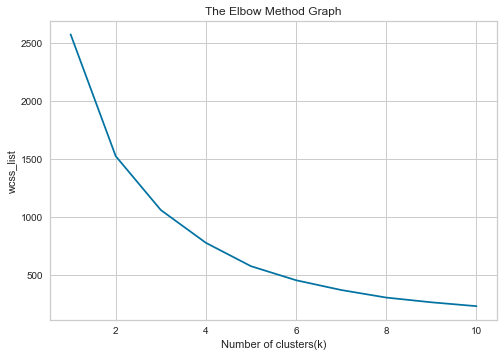

In [357]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

* The results are not as conclusive in the depiction above as in other landmark situations; let us continue.

#### B. Silhouette Score Method

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a

Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b

Silhouette score, S, for each sample is calculated using the following formula:

\(S = \frac{(b - a)}{max(a, b)}\)

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

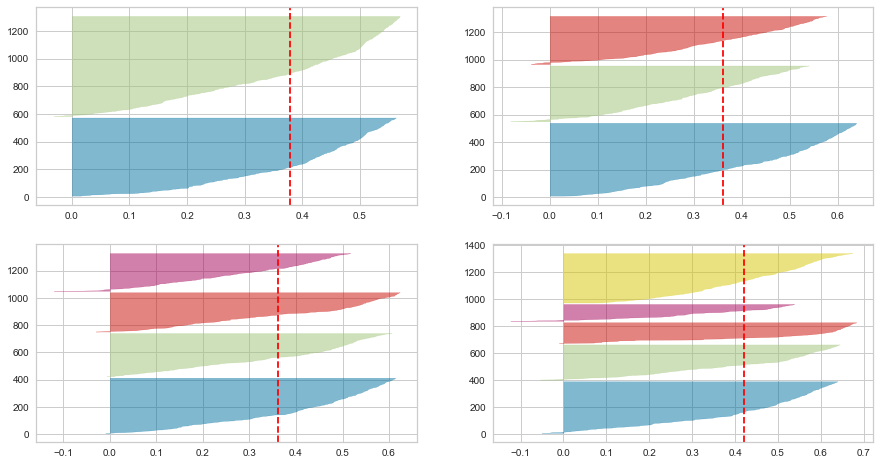

In [358]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2, 6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

* 5 and 4 appear suboptimal due to the fact the cluster sizes are so uneven (5 more than 4), even though both have silhouette scores above 0.5 for each individual cluster (and some above 0.6). Also, the estimated wrongly-attributed samples of clusters (example is the purple behind the purple cluster in both 5 and 4) are materially prevalent.


* Of 3 and 2, the cluster sizes in the hypothetical case of two clusters appears closer to being symmetrical than in the case of three clusters. It should be noted that even in these cases, there are estimated wrongly-attributed samples.

#### C. Gap Method

According to statistics (and as shown above), the best K is located at the 'elbow' of the clusters inertia while K increases. This heuristic has been translated into a more formalized procedure by the Gap Statistics; the main idea of the methodology is to compare the clusters' inertia on the data to cluster and a reference dataset. The optimal choice of K is given by k for which the gap between the two results is maximum.

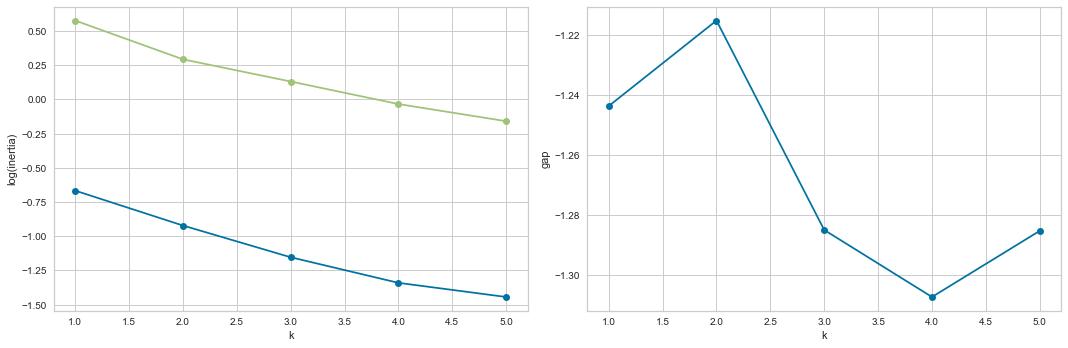

In [359]:
from sklearn.metrics import pairwise_distances

def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=5, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 5
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), x, k_max)


plt.figure(figsize=(15,5))

axe1 = plt.subplot(121)
axe1.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
axe1.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')

axe2 = plt.subplot(122)
axe2.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')

plt.tight_layout()
plt.show()

* It should be noted that the gaps are negative; 4 clusters, on an absolute basis, actually represents the maximum "gap", and not 2 clusters.


* With the conclusivity of the gap statistic and relooking at the silhouette scores, we will continue with 4 clusters.

# 7. Run K-Means

In [367]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

In [368]:
df['clusters'] = y_predict
df.head()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ImgVariance,ImgSkewness,ImgKurtosis,ImgEntropy,ImgClass,clusters
0,1.417967,1.085394,-0.939076,-0.175634,0.0,0
1,1.167414,-0.956603,0.314879,0.598848,0.0,1
2,1.016545,1.341530,-1.383288,-1.228471,0.0,0
3,-0.135930,-1.299950,1.072380,0.058061,0.0,2
4,1.352555,1.369687,-1.368811,-1.015218,0.0,0


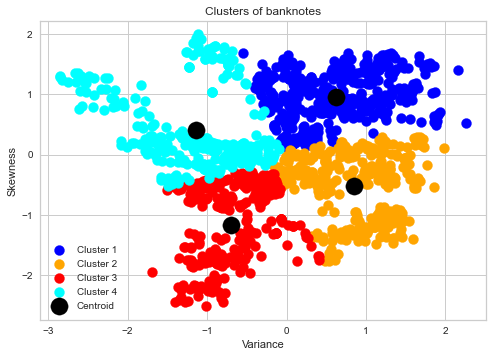

In [369]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'orange', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
#plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster 
#plt.scatter(x[y_predict == 5, 0], x[y_predict == 5, 1], s = 100, c = 'black', label = 'Cluster 6') #for sixth cluster 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid')   
plt.title('Clusters of banknotes')  
plt.xlabel('Variance')  
plt.ylabel('Skewness')  
plt.legend()  
plt.show()  

* Looking above, it appears a reasonable set of clusters are found in the data.


* It appears four quandrants are found for clusters;

    1. Cluster 1 - Banknote images with high skewness and high variance

    2. Cluster 2 - Banknote images with low skewness and high variance

    3. Cluster 3 - Banknote images with low skewness and low variance

    4. Cluster 4 - Banknote images with high skewness and low variance
    

* Especially in Quadrant 4, there appears to be a lower density than the other quadrants, though there is not such a gargantuan difference in amount of datapoints (see below); otherwise, fairly ideal.

<AxesSubplot:>

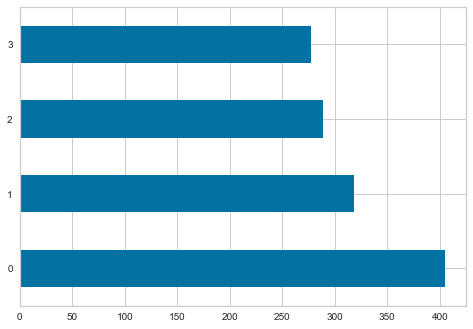

In [370]:
df['clusters'].value_counts().plot(kind='barh')

* There are, with outliers removed, less than 1300 datapoints in the dataset; with the lowest level of datapoints in a cluster approaching 275 in cluster 4, the smallest cluster definitely accounts for at least 20% of the dataset, with the highest (cluster 1) likely not even up to 33% (barely above 400 datapoints); this is not a terrible imbalance for four clusters.

# 8. Extra - Clustering Scores

From https://notebook.community/mayankjohri/LetsExplorePython/Section%203%20-%20Machine%20Learning/UnSupervised%20Learning%20Algorithm/2.%20Clustering%20performance%20evaluation:

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric.

A drawback typically for doing this (why we are calling it extra) is most of these scores require knowledge of ground truth classes (target variables) while is almost never available in practice; in the case of the banknote dataset, they are (as ImgClass). 

The meaning of the scores:

* Adjusted Rand Index = A score that measures the similarity of the two assignments, ignoring permutations and with chance normalization


* V-measure = A score which is defined as the harmonic mean between homogeneity and completeness


* Mutual Information = A score that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI - Mutual Information) and Adjusted Mutual Information(AMI)


* Homogeneity =  A score which shows how well each cluster contains only members of a single class.


* Completeness =  A score which shows how well all members of a given class are assigned to the same cluster.


* Mallows-Fowlkes = A score which is defined as the geometric mean of the pairwise precision and recall.

It should be noted with 4 clusters and only 2 classes, there's already a built-in mismatch in the scores, but we will still take a look.

,Value
Adjusted Rand,0.261580
V Measure,0.280285
Mutual Info,0.287870
Adjusted Mutual Info,0.279467
Homogeneity,0.423692
Completeness,0.209407
Fowlkes-Mallows,0.545045


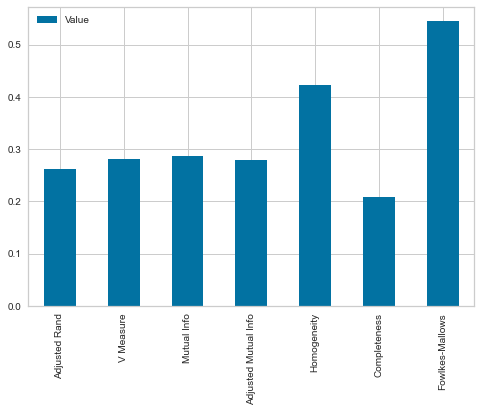

In [371]:
labels_true = df["ImgClass"] #(y)
labels_pred = kmeans.predict(x)

score_name = ["Adjusted Rand", "V Measure", "Mutual Info", "Adjusted Mutual Info", "Homogeneity", \
              "Completeness", "Fowlkes-Mallows"]

score = [metrics.adjusted_rand_score(labels_true, labels_pred),
         metrics.v_measure_score(labels_true, labels_pred), 
         metrics.mutual_info_score(labels_true, labels_pred),
         metrics.adjusted_mutual_info_score(labels_true, labels_pred),
         metrics.homogeneity_score(labels_true, labels_pred),
         metrics.completeness_score(labels_true, labels_pred),
         metrics.fowlkes_mallows_score(labels_true, labels_pred)
        ]

score_df = pd.DataFrame(score, index=score_name, columns = ['Value'])

score_df.plot(kind='bar')
score_df

* All are scores between 0 and 1 (except Adjusted Rand Index, which is -1 and 1).


* The highest score by a significant margin is the Fowlkes-Mallows score, which suggests good similarity between the clusters, likely in part because of having 4 clusters and two classes.


* Homogeneity is much stronger than completeness; meaning although a lot of the same class datapoints are in clusters, a lot of clusters don't include all of the classes of the same cluster. Completeness should by default go down the more the amount of clusters differs from the amount of class labels in the target variable (split up data points more; higher likelihood similar points end up in different clusters, entropically leading to the point of each data point being its own cluster). V measure is the harmonic mean of homogeneity and completeness, and is definitely between the two.


* Adjusted Rand, a measure of similarity like Fowlkes-Mallows and Homogeneity, appears to be lower than other aimilarity measures; this suggests that datapoints are randomly assigned in the clusters.


* The Mutual Information scores are not much better than the Rand score; meaning there is not as much you can learn about a feature/cluster in the dataset based on another.

# 7. Conclusion

* We generated four clusters for the bank-note authentication dataset using K-means clustering.


* We made sure data was scaled with no outliers and chose two variables that were not high in correlation to avoid multicollinearity.


* We used clustering scores to determine the strength of our clustering.